# 量化投资：
相关文本知识课件链接  https://www.heywhale.com/mw-org/gcyv1/project/65008c03518d0a92c0a02f1f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import akshare as ak
import tushare as ts
import warnings
import time

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#获取股票数据
stock_000423=ak.stock_zh_a_hist(
symbol="000423",period="daily",start_date='20000101',adjust="hfq"
    #symbol股票代码，adjust 默认hfq 后复权数据，qfq 是前复权数据 bfq 不复权数据
)
stock_000423
#振幅 =（当日最高价 - 当日最低价）/ 前一交易日收盘价
#涨跌幅=（今日收盘价 - 昨日收盘价）/昨日收盘价 * 100%
#涨跌额= 今日收盘价 - 昨日收盘价
#换手率=成交量 / 流通股本 * 100%，换手率越高说明股票的流通性越好，市场对这支股票的关注度越高

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2000-01-04,24.86,25.21,25.53,24.18,6787,8.061847e+06,5.39,0.60,0.15,0.69
1,2000-01-05,25.42,24.86,25.71,24.81,7585,9.166008e+06,3.57,-1.39,-0.35,0.77
2,2000-01-06,25.08,25.80,25.98,24.63,8487,1.021883e+07,5.43,3.78,0.94,0.86
3,2000-01-07,26.18,27.41,27.41,26.18,16248,2.074834e+07,4.77,6.24,1.61,1.66
4,2000-01-10,27.54,27.43,27.95,26.85,14382,1.862971e+07,4.01,0.07,0.02,1.47
...,...,...,...,...,...,...,...,...,...,...,...
5587,2023-09-19,540.11,535.06,541.94,532.68,25404,1.241333e+08,1.71,-1.10,-5.96,0.39
5588,2023-09-20,535.06,534.51,538.64,531.76,14919,7.278852e+07,1.29,-0.10,-0.55,0.23
5589,2023-09-21,534.51,529.10,535.24,528.55,23413,1.132646e+08,1.25,-1.01,-5.41,0.36
5590,2023-09-22,529.92,532.49,533.04,526.26,30002,1.445645e+08,1.28,0.64,3.39,0.47


In [4]:
#检查数据是否有缺失或者异常
stock_000423.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      5592 non-null   object 
 1   开盘      5592 non-null   float64
 2   收盘      5592 non-null   float64
 3   最高      5592 non-null   float64
 4   最低      5592 non-null   float64
 5   成交量     5592 non-null   int64  
 6   成交额     5592 non-null   float64
 7   振幅      5592 non-null   float64
 8   涨跌幅     5592 non-null   float64
 9   涨跌额     5592 non-null   float64
 10  换手率     5592 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 480.7+ KB


In [37]:
#把日期设置成time格式，并设置成索引
stock_000423.set_index(pd.to_datetime(stock_000423['日期']),inplace=True)
# stock_000423.index
stock_000423['收盘'].values

array([ 25.21,  24.86,  25.8 , ..., 529.1 , 532.49, 534.33])

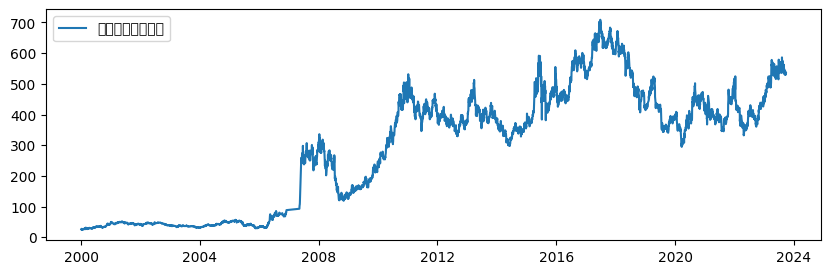

In [41]:
#看一下收盘价格的趋势是啥样的

plt.rcParams['font.sans-serif'] = ['Source Han Sans CN']#和鲸平台可用的中文字体
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(10,3))
plt.plot(stock_000423.index.to_list(),stock_000423['收盘'].values.tolist(),label='股票收盘价走势图')
plt.legend(loc='upper left')

###### 复权数据的意义：
由于股票存在配股、分拆、合并和发放股息等事件，会导致股价出现较大的变化。若不注意这一点就处理数据、计算各种指标，将会导致它们失去连续性，计算收益也会出现错误。因此通过复权的方式看股票的真实价值
前复权适合看股票的长期收益
后复权适合看短期收益

In [43]:
#用tushare 的API 获取股票数据
tushare_pro=ts.pro_api('81ec7c24d1ef9512cc1edc6fce644d245ff05576bc4d5deae2c523cc')
stock_600000=tushare_pro.daily(ts_code='600000.SH',start_date='20000101',end_date='20230925')
stock_600000

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20230925,7.18,7.20,7.13,7.16,7.18,-0.02,-0.2786,307174.43,220116.848
1,600000.SH,20230922,7.10,7.18,7.07,7.18,7.10,0.08,1.1268,321812.71,229743.638
2,600000.SH,20230921,7.13,7.17,7.09,7.10,7.13,-0.03,-0.4208,273069.65,194557.948
3,600000.SH,20230920,7.12,7.15,7.08,7.13,7.13,0.00,0.0000,163030.47,116256.771
4,600000.SH,20230919,7.08,7.13,7.05,7.13,7.07,0.06,0.8487,282345.75,200455.771
...,...,...,...,...,...,...,...,...,...,...,...
5630,600000.SH,20000110,27.00,27.85,26.71,27.25,26.90,0.35,1.3000,165397.00,450453.518
5631,600000.SH,20000107,26.30,27.50,26.12,26.90,25.99,0.91,3.5000,213553.00,575751.082
5632,600000.SH,20000106,25.18,26.30,25.05,25.99,25.28,0.71,2.8100,62297.00,160059.798
5633,600000.SH,20000105,25.57,25.98,25.15,25.28,25.57,-0.29,-1.1300,52528.00,134465.427


###### 几种常见的量化投资策略：
1、根据公司财务数据选股票，看它是否能长期上涨
2、用计数指标选择买入卖出的时间
3、利用统计学套利，类似期货价差套利
4、事件驱动策略：放假了电影股票可能会涨等等

###### 双均线策略实现：短周期均线高于长周期均线的时候买入，反之卖出

In [47]:
#=计算移动平均线MA moving average 这里计算 5日和 20日的均线
stock_000423['ma5']=stock_000423['收盘'].rolling(5).mean()
stock_000423['ma20']=stock_000423['收盘'].rolling(20).mean()
stock_000423

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,ma5,ma20
日期,,,,,,,,,,,,,
2000-01-04,2000-01-04,24.86,25.21,25.53,24.18,6787,8.061847e+06,5.39,0.60,0.15,0.69,NaN,NaN
2000-01-05,2000-01-05,25.42,24.86,25.71,24.81,7585,9.166008e+06,3.57,-1.39,-0.35,0.77,NaN,NaN
2000-01-06,2000-01-06,25.08,25.80,25.98,24.63,8487,1.021883e+07,5.43,3.78,0.94,0.86,NaN,NaN
2000-01-07,2000-01-07,26.18,27.41,27.41,26.18,16248,2.074834e+07,4.77,6.24,1.61,1.66,NaN,NaN
2000-01-10,2000-01-10,27.54,27.43,27.95,26.85,14382,1.862971e+07,4.01,0.07,0.02,1.47,26.142,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,2023-09-19,540.11,535.06,541.94,532.68,25404,1.241333e+08,1.71,-1.10,-5.96,0.39,536.252,542.0315
2023-09-20,2023-09-20,535.06,534.51,538.64,531.76,14919,7.278852e+07,1.29,-0.10,-0.55,0.23,536.326,540.8205
2023-09-21,2023-09-21,534.51,529.10,535.24,528.55,23413,1.132646e+08,1.25,-1.01,-5.41,0.36,534.566,540.1005


In [50]:
#计算交易信号：短期均线大于长期均线，标记1 ，反之标记0
stock_000423.loc[(stock_000423['ma5']>stock_000423['ma20']),'signal']=1
stock_000423.loc[(stock_000423['ma5']<stock_000423['ma20']),'signal']=0
#当signal 从0变成1 的时候，说明短期均线向上穿过了长期均线，让order 值为1，适合买入
#diff 方法用来计算和上一个数值的差值
stock_000423['order']=stock_000423['signal'].diff()
stock_000423

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,ma5,ma20,signal,order
日期,,,,,,,,,,,,,,,
2000-01-04,2000-01-04,24.86,25.21,25.53,24.18,6787,8.061847e+06,5.39,0.60,0.15,0.69,NaN,NaN,NaN,NaN
2000-01-05,2000-01-05,25.42,24.86,25.71,24.81,7585,9.166008e+06,3.57,-1.39,-0.35,0.77,NaN,NaN,NaN,NaN
2000-01-06,2000-01-06,25.08,25.80,25.98,24.63,8487,1.021883e+07,5.43,3.78,0.94,0.86,NaN,NaN,NaN,NaN
2000-01-07,2000-01-07,26.18,27.41,27.41,26.18,16248,2.074834e+07,4.77,6.24,1.61,1.66,NaN,NaN,NaN,NaN
2000-01-10,2000-01-10,27.54,27.43,27.95,26.85,14382,1.862971e+07,4.01,0.07,0.02,1.47,26.142,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,2023-09-19,540.11,535.06,541.94,532.68,25404,1.241333e+08,1.71,-1.10,-5.96,0.39,536.252,542.0315,0.0,0.0
2023-09-20,2023-09-20,535.06,534.51,538.64,531.76,14919,7.278852e+07,1.29,-0.10,-0.55,0.23,536.326,540.8205,0.0,0.0
2023-09-21,2023-09-21,534.51,529.10,535.24,528.55,23413,1.132646e+08,1.25,-1.01,-5.41,0.36,534.566,540.1005,0.0,0.0


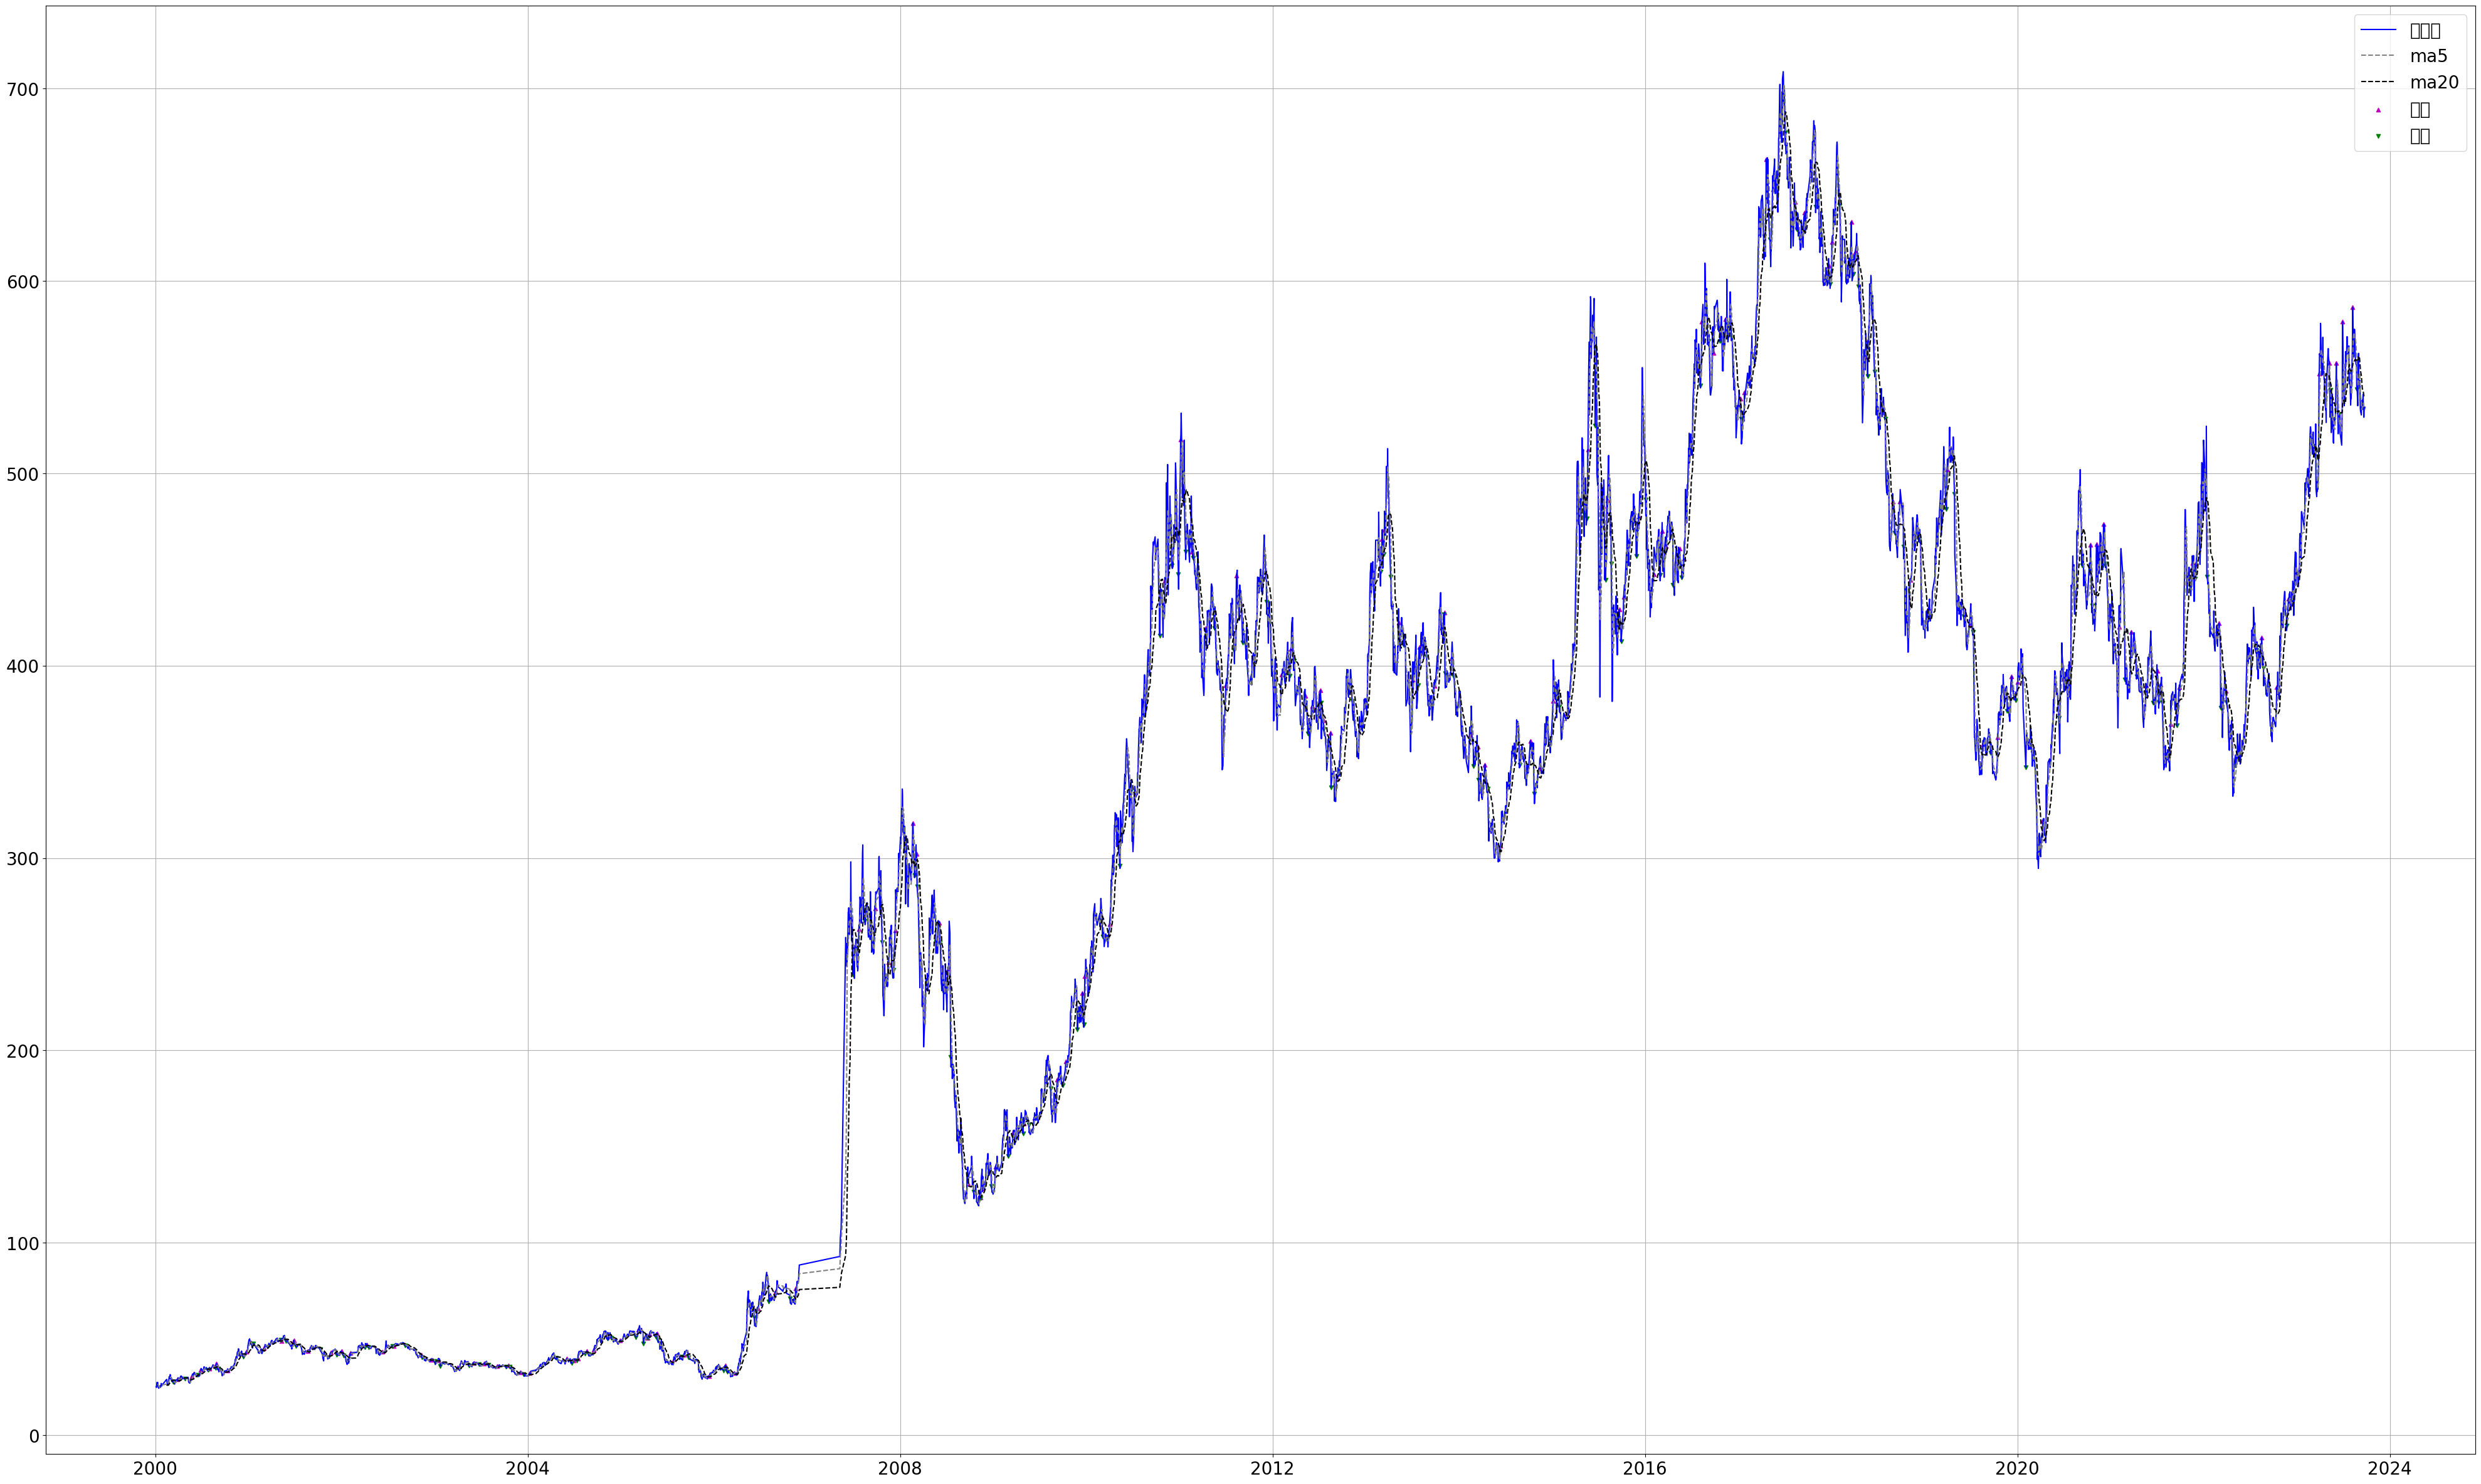

In [52]:
#可视化交易信号
plt.figure(figsize=(50,30))
plt.plot(stock_000423['收盘'],color='b',label='收盘价')
plt.plot(stock_000423['ma5'],ls='--',color='gray',label='ma5')
plt.plot(stock_000423['ma20'],ls='--',color='k',label='ma20')
#画散点图
plt.scatter(stock_000423.loc[stock_000423['order']==1].index,stock_000423['收盘'][stock_000423.order==1],marker='^',s=20,color='m',label='买入')
plt.scatter(stock_000423.loc[stock_000423['order']==-1].index,stock_000423['收盘'][stock_000423.order==-1],marker='v',s=20,color='g',label='卖出')
#设置坐标轴刻度线
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
#设置图形里的小部件
plt.grid()
plt.show()

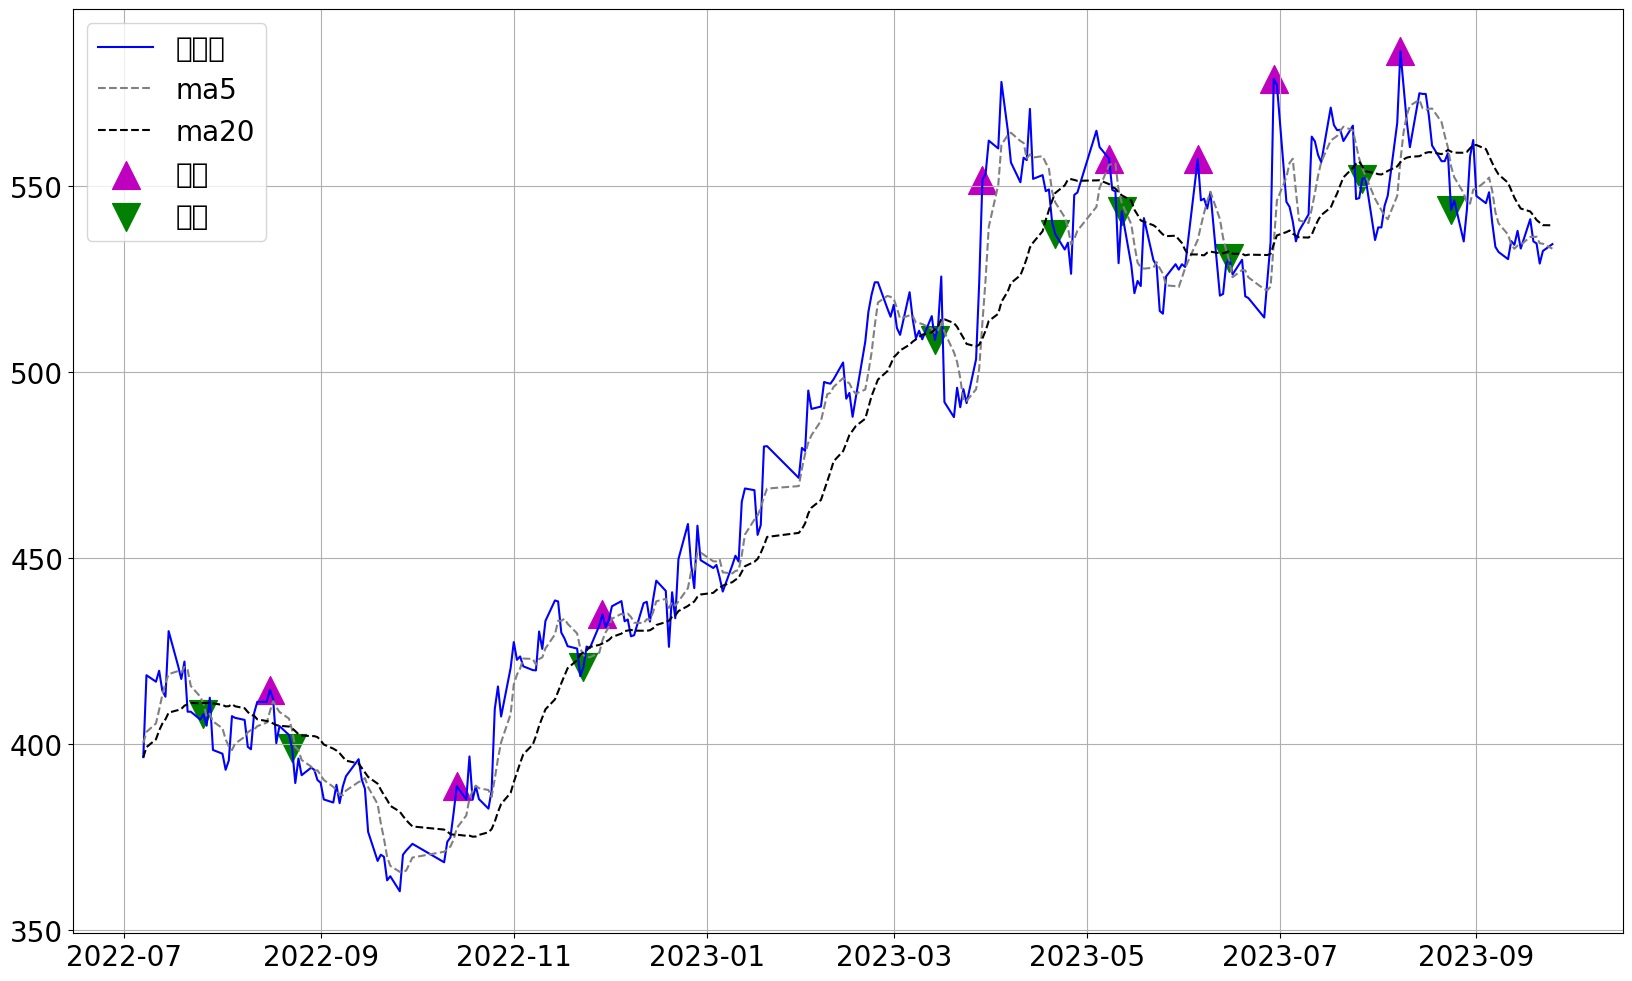

In [60]:
#放大一块区间,只看最近300天的
#可视化交易信号
stock_000423_copy=stock_000423.iloc[-300:,:]
plt.figure(figsize=(20,12))
plt.plot(stock_000423_copy['收盘'],color='b',label='收盘价')
plt.plot(stock_000423_copy['ma5'],ls='--',color='gray',label='ma5')
plt.plot(stock_000423_copy['ma20'],ls='--',color='k',label='ma20')
#画散点图
plt.scatter(stock_000423_copy.loc[stock_000423_copy['order']==1].index,stock_000423_copy['收盘'][stock_000423_copy.order==1],marker='^',s=400,color='m',label='买入')
plt.scatter(stock_000423_copy.loc[stock_000423_copy['order']==-1].index,stock_000423_copy['收盘'][stock_000423_copy.order==-1],marker='v',s=400,color='g',label='卖出')
#设置坐标轴刻度线
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
#设置图形里的小部件
plt.grid()
plt.show()

In [73]:
#计算一下，如果按上面计算的交易信号做交易，会有怎么样的收益呢？
#计算N日后涨跌幅度
day_list=[5,10,20,60]
def calculate_N_pct(data,day_list):
    for day in day_list:
        data['%s日后涨幅'%day]=data['收盘'].shift(0-day)/data['收盘']-1
        #如果和几日前的数据比，上涨了就记为1
        data.loc[data['%s日后涨幅'%day]>0,'%s日后是否上涨'%day]=1
        data.loc[data['%s日后涨幅'%day]<=0,'%s日后是否上涨'%day]=0
    return data

stock_000423=calculate_N_pct(stock_000423,day_list)
stock_000423

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,...,signal,order,5日后涨幅,5日后是否上涨,10日后涨幅,10日后是否上涨,20日后涨幅,20日后是否上涨,60日后涨幅,60日后是否上涨
日期,,,,,,,,,,,,,,,,,,,,,
2000-01-04,2000-01-04,24.86,25.21,25.53,24.18,6787,8.061847e+06,5.39,0.60,0.15,...,NaN,NaN,0.023403,1.0,-0.013883,0.0,0.126537,1.0,0.201904,1.0
2000-01-05,2000-01-05,25.42,24.86,25.71,24.81,7585,9.166008e+06,3.57,-1.39,-0.35,...,NaN,NaN,0.001609,1.0,0.008850,1.0,0.098954,1.0,0.228882,1.0
2000-01-06,2000-01-06,25.08,25.80,25.98,24.63,8487,1.021883e+07,5.43,3.78,0.94,...,NaN,NaN,-0.039147,0.0,-0.006977,0.0,0.009302,1.0,0.167442,1.0
2000-01-07,2000-01-07,26.18,27.41,27.41,26.18,16248,2.074834e+07,4.77,6.24,1.61,...,NaN,NaN,-0.110179,0.0,-0.093032,0.0,-0.031011,0.0,0.067494,1.0
2000-01-10,2000-01-10,27.54,27.43,27.95,26.85,14382,1.862971e+07,4.01,0.07,0.02,...,NaN,NaN,-0.091506,0.0,-0.020416,0.0,-0.000729,0.0,0.093328,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,2023-09-19,540.11,535.06,541.94,532.68,25404,1.241333e+08,1.71,-1.10,-5.96,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-20,2023-09-20,535.06,534.51,538.64,531.76,14919,7.278852e+07,1.29,-0.10,-0.55,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-21,2023-09-21,534.51,529.10,535.24,528.55,23413,1.132646e+08,1.25,-1.01,-5.41,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
stock_000423.columns

Index(['日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率',
       'ma5', 'ma20', 'signal', 'order', '5日后涨幅', '5日后是否上涨', '10日后涨幅',
       '10日后是否上涨', '20日后涨幅', '20日后是否上涨', '60日后涨幅', '60日后是否上涨'],
      dtype='object')

In [95]:
#计算交易信号的胜率和赔率
#胜率 win rate：如果进行了100次交易，有60次是盈利的，那么胜率就是 60%
#赔率 odds：如果平均每笔盈利交易可以赚100块，平均每笔亏损交易损失50块，那么盈亏比就是 100/50=2
def signal_order_buy_sell(data_code,day_list):
    signal_order_buy={}
    signal_order_sell={}
    for signal_01,data in data_code.groupby('order'):
        # order ==1 的时候，是适合买入的信号
        if signal_01==1:
            for x in day_list: 
                signal_order_buy.update(
#                     计算出x日后上涨的天数
                    {'%d日后涨幅大于0比例为'%x:data[data['%d日后是否上涨'%x]==1].shape[0]/data.shape[0],
                    #计算上涨这些天的平均收益
                     '%d且上涨平均收益为:'%x:data[data['%d日后是否上涨'%x]==1]['%d日后涨幅'%x].mean(),
                     #计算下跌的天数
                     '%d日后涨幅小于0比例为'%x:data[data['%d日后是否上涨'%x]==0].shape[0]/data.shape[0],
                      #计算下跌这些天的平均收益
                        '%d且下跌平均收益为:'%x:data[data['%d日后是否上涨'%x]==0]['%d日后涨幅'%x].mean()
                    }
                )
#         order==-1，是适合卖出的信号
        elif signal_01==-1:
            for y in day_list:
                signal_order_sell.update(
                                    #计算出x日后上涨的天数
                    {'%d日后涨幅大于0比例为'%y:data[data['%d日后是否上涨'%y]==1].shape[0]/data.shape[0],
                    #计算上涨这些天的平均收益
                    '%d且上涨平均收益为:'%y:data[data['%d日后是否上涨'%y]==1]['%d日后涨幅'%y].mean(),
                     #计算下跌的天数
                     '%d日后涨幅小于0比例为'%y:data[data['%d日后是否上涨'%y]==0].shape[0]/data.shape[0],
                      #计算下跌这些天的平均收益
                          '%d且下跌平均收益为:'%y:data[data['%d日后是否上涨'%y]==0]['%d日后涨幅'%y].mean()}
                )
    return signal_order_buy,signal_order_sell

signal_order_buy,signal_order_sell=signal_order_buy_sell(stock_000423,day_list)

# signal_order_buy_sell(stock_000423,day_list)
    

In [96]:
#生成一个方便看的表
signal_order_buy=pd.DataFrame(signal_order_buy.items(),columns=['买入信号发生时','数值'])
signal_order_buy

,买入信号发生时,数值
0,5日后涨幅大于0比例为,0.508982
1,5且上涨平均收益为:,0.033788
2,5日后涨幅小于0比例为,0.491018
3,5且下跌平均收益为:,-0.031635
4,10日后涨幅大于0比例为,0.520958
5,10且上涨平均收益为:,0.053666
6,10日后涨幅小于0比例为,0.479042
7,10且下跌平均收益为:,-0.046047
8,20日后涨幅大于0比例为,0.502994
9,20且上涨平均收益为:,0.101082


In [97]:
#计算用这个策略下的期望收益率
#计算公式=上涨的概率*上涨的平均收益率+下跌的概率*下跌的平均收益率
def calculate_E(data,day_list):
    for o,p in zip(range(0,len(signal_order_buy),4),day_list):
        signal_data=data.loc[o,'数值']*data.loc[o+1,'数值']+data.loc[o+2,'数值']*data.loc[o+3,'数值']
        print('买入信号发生后，%d日的期望收益率为'%p,signal_data)
    
calculate_E(signal_order_buy,day_list)

买入信号发生后，5日的期望收益率为 0.0016643285453577256
买入信号发生后，10日的期望收益率为 0.005899181215189536
买入信号发生后，20日的期望收益率为 0.015775050090027255
买入信号发生后，60日的期望收益率为 0.056835202832641436


###### 结论
#买入信号发生后，时间越长，期望收益率越高

###### 进入策略评价环节

In [106]:
stock_back=pd.DataFrame(index=stock_000423.index)
#在索引不变的情况下，向后挪了一个位置，为了模拟数据的时候模拟：先看到变化然后再操作
stock_back['signal']=stock_000423['signal'].shift(1)
# # 计算收益率=（今天的收盘价格/昨天的收盘价格-1）*交易信号（1是短期均线高于长期均线）
stock_back['每日收益率序列']=(stock_000423['收盘']/stock_000423['收盘'].shift(1)-1)*stock_back['signal']
# #cumprod 计算累计乘积
stock_back['累计收益率']=(stock_back['每日收益率序列']+1).cumprod()
stock_back

,signal,每日收益率序列,累计收益率
日期,,,
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN
...,...,...,...
2023-09-19,0.0,-0.0,8.89996
2023-09-20,0.0,-0.0,8.89996
2023-09-21,0.0,-0.0,8.89996


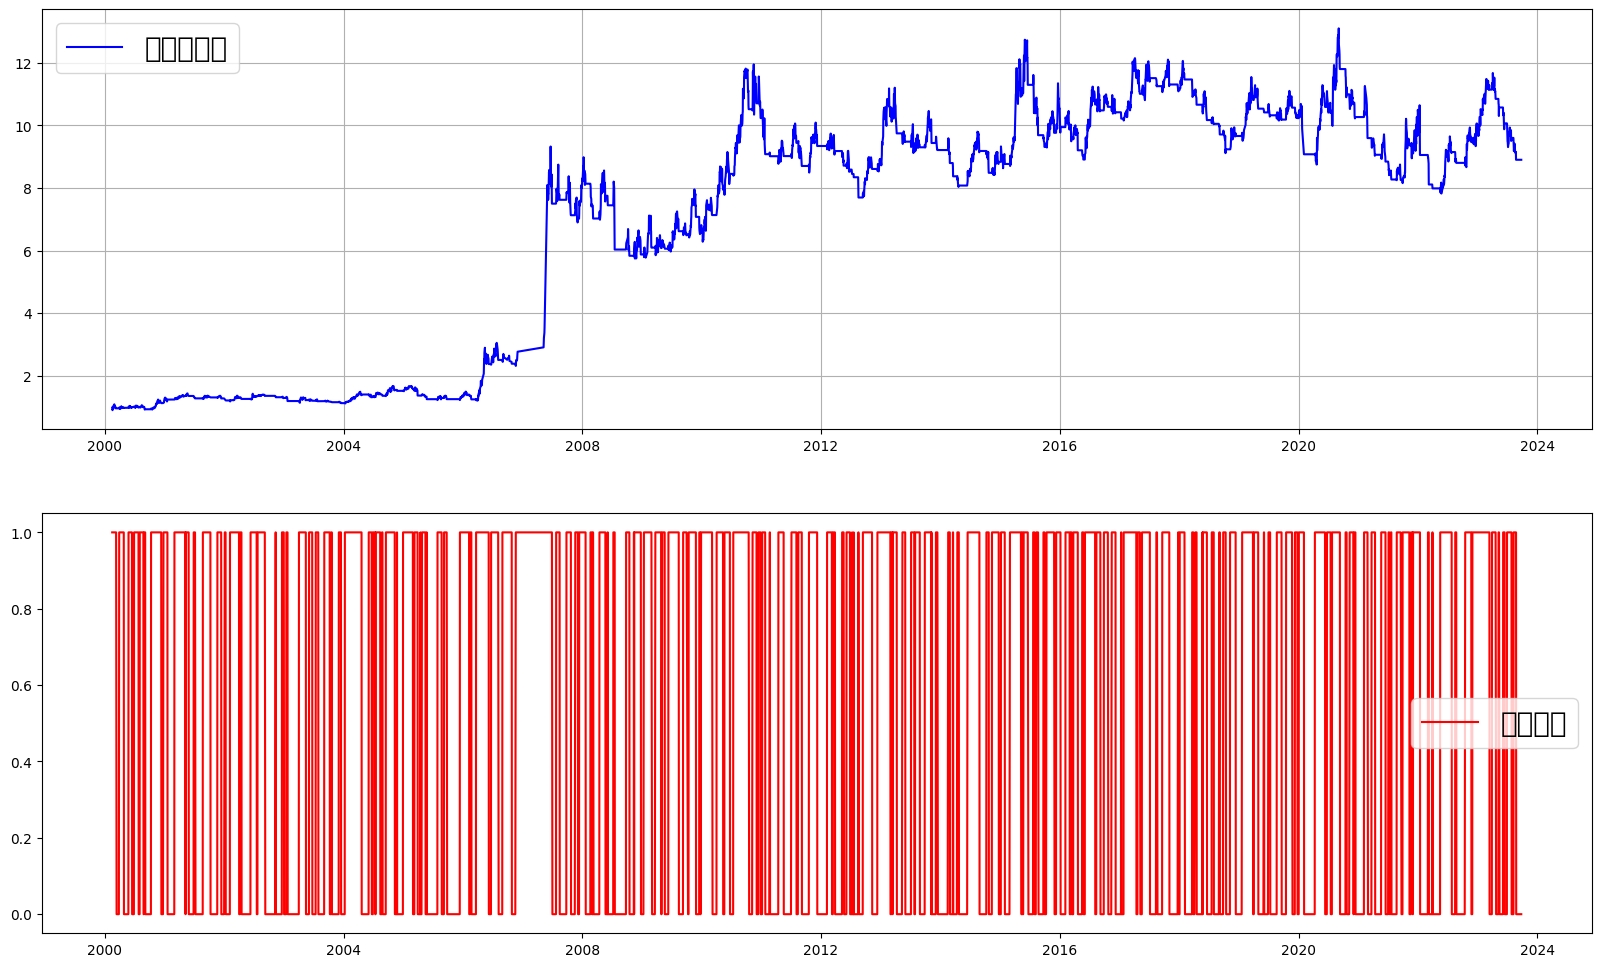

In [105]:
#累计收益率可视化
fig,axex=plt.subplots(2,1,figsize=(20,12),dpi=100)
#把一维数组的值分给两个变量 ax1 ax2
ax1,ax2=axex.flatten()
ax1.plot(stock_back['累计收益率'],color='b',label='累计收益率')
ax1.grid()
ax1.legend(fontsize=20)
ax2.plot(stock_back['signal'],color='r',label='持仓信号')
ax2.legend(fontsize=20)

###### 这里可以看到累计收益率从2012年开始就几乎没有变化了

In [108]:
#计算年化收益率
def calculate_year_return(final_value,initial_value,years):
    _re=(final_value/initial_value)**(1/years)-1
    return _re

years=22.5
initial_value=1
final_value=8.89

#计算年化收益率
annualized_return=calculate_year_return(final_value,initial_value,years)
print("该策略的年化收益率为{:.2%}".format(annualized_return))

该策略的年化收益率为10.20%


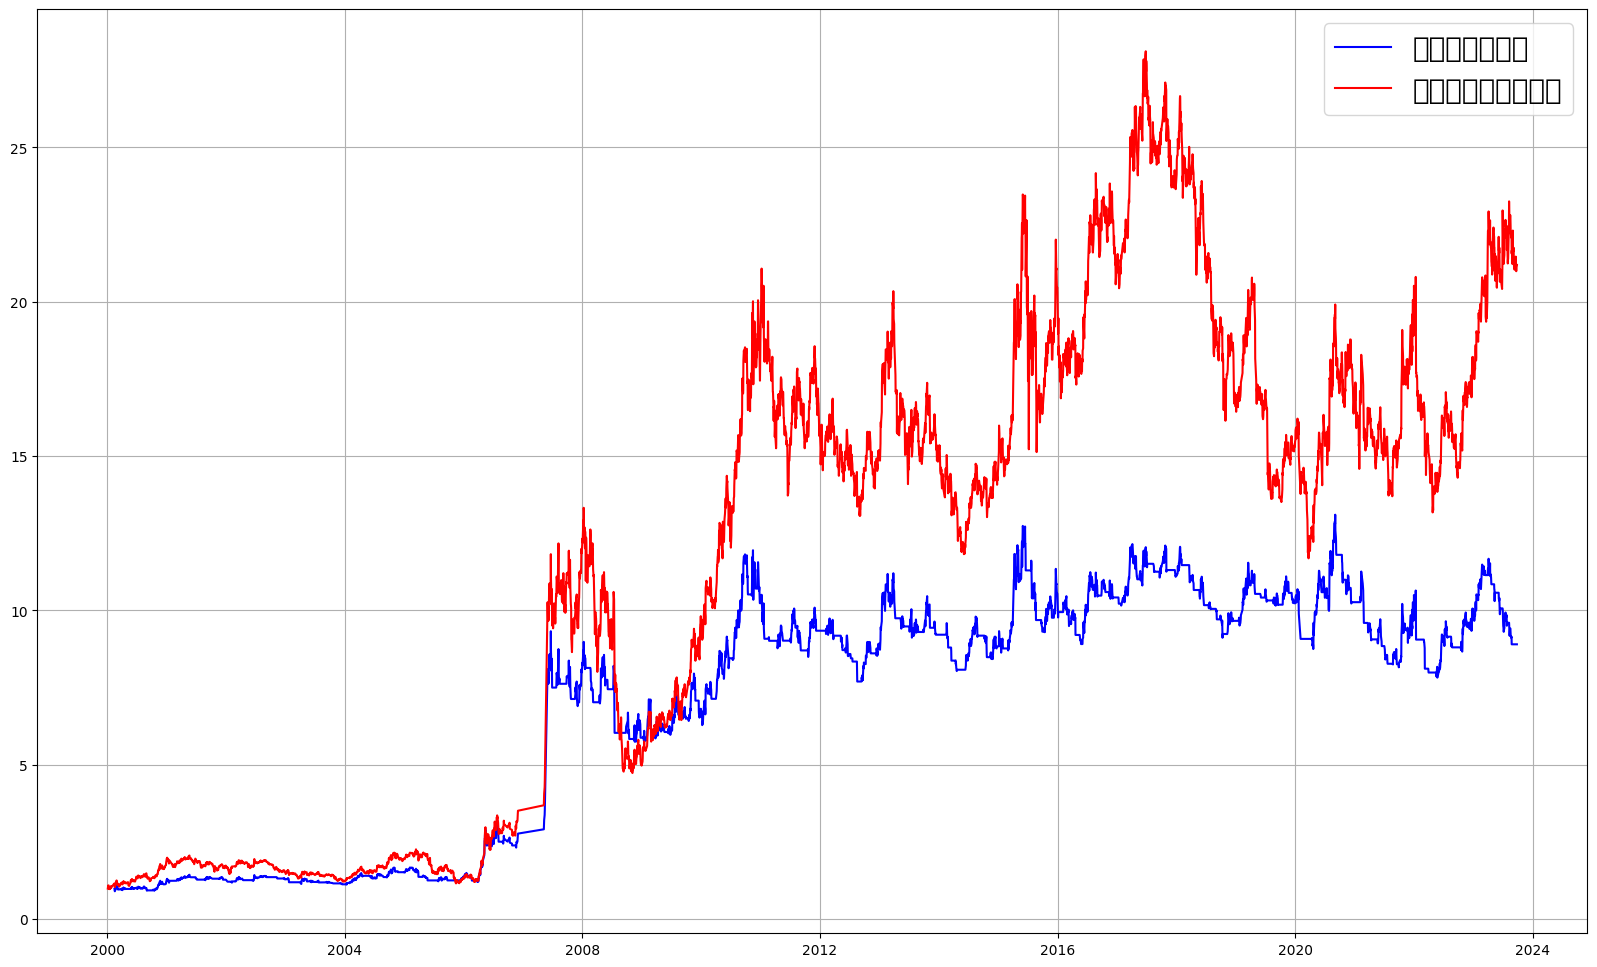

In [110]:
#与基准收益率做对比
fig,ax1=plt.subplots(figsize=(20,12),dpi=100)
ax1.plot(stock_back['累计收益率'],color='b',label='策略累计收益率')
ax1.plot((stock_000423['收盘']/stock_000423['收盘'].shift(1)).cumprod(),color='r',label='这个股票的基准走势')
#加入网格线
ax1.grid()
ax1.legend(fontsize=20)

###### 计算夏普比率
#夏普比率：评估这个投资组合每单位风险所获得的超额回报
#夏普比率=（年化收益率-无风险利率）/投资组合的年化波动率
无风险利率是指：投资者在没有任何风险的情况下能获得的预期回报率，一般认为国债利率为无风险利率
参考值：股神的夏普比率为0.8左右

In [112]:
#计算这个股票的年化波动率
def calculate_volatility(return_series):
    #计算收益率的标准差
    volatility=np.std(return_series)
    #调整为年化波动率：乘以根号下252  默认一年的交易日数据为 252
    _volatility=volatility*np.sqrt(252)
    return _volatility

#计算夏普比例
def calculate_sharpe(annualized_return,annualized_volatility,risk_free_rate):
    sharp_ratio=(annualized_return-risk_free_rate)/annualized_volatility
    return sharp_ratio

annualized_return=0.102
annualized_volatility=calculate_volatility(stock_back['每日收益率序列'].fillna(0).values)
risk_free_rate=0.03

sharp_ratio=calculate_sharpe(annualized_return,annualized_volatility,risk_free_rate)
print("sharp ratio:{:2f}".format(sharp_ratio))

sharp ratio:0.189631


###### 计算最大回撤
最大回撤是指累计收益率 一段时间内峰值到谷底的最大跌幅，可以帮助投资者 评估风险和潜在损失
可以认为是最大的本金损失百分比

In [121]:
def  calculate_max_to_min(prices):
    max_drawdown=0
    peak=prices[0]
    
    #在这个循环里，peak 总是目前遍历的price 里最大的那个值，且max_drawdown 一直是最大回撤
    for price in prices:
        if price>peak:
            peak=price
        drawdown=(peak-price)/peak
        if drawdown>max_drawdown:
            max_drawdown=drawdown
    return max_drawdown

#计算最大回撤
max_drawdown=calculate_max_to_min(stock_back['累计收益率'].fillna(0).values)
print("最大回撤是{:.2%}".format(max_drawdown))
print("最大回撤是%f"%max_drawdown)

最大回撤是40.29%
最大回撤是0.402929


#### 总结
在东阿阿胶这个股票上应用均线策略：
1、最终净值为8.89，累计净收益率
2、年化收益率为10.2%
3、sharp ratio：0.189
4、最大回撤为 40.29%

年化收益率不高，得到的超额回报不高，且投资损失的风险很大，均值策略在这个股票上的应用效果非常差哈哈哈哈哈

#### 策略模型优化与风险管理
策略模型优化的方向和方法主要有以下几个方面：

1.更新和优化模型参数：通过对模型参数进行更新和优化，提高模型对市场变化的敏感度和预测精度。这可以通过调整模型参数、添加新变量或重新构建模型来实现。

2.引入新的模型和方法：不断研究和引入新的模型和方法，可以提高策略模型的适应性和预测能力。这可能涉及到更复杂的数学和统计方法，以及最新的机器学习算法等。

3.增加数据源：通过增加更多的数据源，可以扩大策略模型的数据基础，提高模型的预测能力和稳定性。这可能包括从多个不同的数据供应商处获取数据，或者使用更高级的数据分析技术，如文本分析等。

4.优化算法交易：通过优化算法交易策略，可以提高交易的效率和盈利能力。这可能包括改进交易算法、优化交易量、确定最佳的交易时间等。

总之，策略模型优化是一个持续不断的过程，需要不断地进行研究和实验，以适应市场的不断变化和提高投资的收益率。

策略风险管理包括以下几个方面：

1.资产配置：投资者可以通过合理配置不同资产类别和在不同市场区域内进行的投资，通过分散投资，降低单一资产或市场区域的风险。这可以通过配置多种资产类别、使用投资组合等方式来实现。

2.止损控制：量化投资策略需要设定合理的止损点位，在投资出现亏损时及时止损，以避免亏损扩大。止损点位的设定可以根据市场走势、历史波动率等方法来确定。

3.风险评估：对投资组合进行全面的风险评估，包括市场风险、信用风险、流动性风险等，以了解投资组合的潜在风险。

4.回撤控制：通过控制投资组合的最大回撤幅度，降低投资组合在极端市场情况下的亏损幅度。这可以通过设定最大回撤阈值、使用止损订单等方式来实现。

5.压力测试：对投资组合进行压力测试，以了解在极端市场情况下投资组合的表现。这可以通过模拟不同市场情景、测试投资组合的波动率等方式来进行。

6.异常检测：通过检测投资组合的异常波动，及时发现并处理潜在的风险。这可以通过建立异常检测机制、定期对投资组合进行审计等方式来实现。

总之，量化投资策略的风险管理需要全面考虑各种风险因素，采取有效的措施来降低风险，确保投资组合的稳健运行。